In [8]:
#Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us in the data dictionary
#Jupyter Lab 3.44, Python 3
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D212\churn_clean.csv')

#Baisc math imports
import numpy as np
from pandas import DataFrame

#For Visualizations
import seaborn as sb
import matplotlib.pyplot as mpl
%matplotlib inline

#For our PCA analysis
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
#This step views the data types and information in churn_clean
print("Floats")
print(churn_df.select_dtypes(include="float").info())

print("Integers")
print(churn_df.select_dtypes(include="integer").info())

print("Objects")
print(churn_df.select_dtypes(include="object").info())

print("Dataset Information")
print(churn_df.info)

Floats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
Integers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non

In [10]:
#Check for any missing values
churn_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [11]:
#Drop categorical or non-continuous variables from dataframe
churn_df = churn_df.drop(columns=['Gender' ,
                                  'Marital',
                                  'Area',
                                  'Contract',
                                  'PaymentMethod',
                                  'Churn' , 
                                  'Techie' , 
                                  'Contract' ,       
                                  'Port_modem' , 
                                  'Tablet' ,
                                  'InternetService' , 
                                  'Phone' , 
                                  'Multiple' ,
                                  'OnlineSecurity' ,
                                  'OnlineBackup', 
                                  'DeviceProtection' ,
                                  'TechSupport' ,
                                  'StreamingTV', 
                                  'StreamingMovies',
                                  'PaperlessBilling',
                                  'Item1',
                                  'Item2',
                                  'Item3',
                                  'Item4',
                                  'Item5',
                                  'Item6',
                                  'Item7',
                                  'Item8'])

In [12]:
#Remove Demographic information
churn_df = churn_df.drop(columns=['CaseOrder' ,
                               'Customer_id' ,
                               'Interaction' ,
                               'UID' ,
                               'City' ,
                               'State' ,
                               'County' ,
                               'Zip' ,
                               'Lat' ,
                               'Lng' ,
                               'Population' ,
                               'TimeZone' ,
                               'Job'
                               ])

In [13]:
#List features for analysis
Features = (list(churn_df))
print('Features for analysis include: \n', Features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


In [14]:
#Use the standardscaler package to standardize our values
num_col = churn_df.columns[churn_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
churn_df[num_col] = scaler.fit_transform(churn_df[num_col])
#Check for scaling
print(churn_df)

      Children       Age    Income  Outage_sec_perweek     Email  Contacts  \
0    -0.972338  0.720925 -0.398778           -0.679978 -0.666282 -1.005852   
1    -0.506592 -1.259957 -0.641954            0.570331 -0.005288 -1.005852   
2     0.890646 -0.148730 -1.070885            0.252347 -0.996779 -1.005852   
3    -0.506592 -0.245359 -0.740525            1.650506  0.986203  1.017588   
4    -0.972338  1.445638  0.009478           -0.623156  1.316700  1.017588   
...        ...       ...       ...                 ...       ...       ...   
9995  0.424900 -1.453214  0.564456           -0.196888 -0.005288  1.017588   
9996  0.890646 -0.245359 -0.201344           -1.095915  0.986203  1.017588   
9997 -0.506592 -0.245359  0.219037           -1.146198 -0.666282 -1.005852   
9998 -0.506592 -0.680187 -0.820588            0.695616  0.655706  0.005868   
9999 -0.506592 -1.211643 -1.091760            0.589028  1.647197  0.005868   

      Yearly_equip_failure    Tenure  MonthlyCharge  Bandwidth_

In [15]:
#Extract Clean dataset
churn_df.to_csv('D212_churn_Task2.csv')

In [16]:
#Creating PCA dataframe
pca = PCA(n_components=10)
Principal_components=pca.fit_transform(churn_df)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10'])
print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.536762  0.171914  1.454843  0.095288 -1.256114  0.702028 -0.110407   
1    -1.658873 -0.084919 -0.961470  1.269270 -1.102248  1.130166 -0.208518   
2    -0.903180 -1.078642  0.158621  0.897587 -1.617589 -0.048204 -0.389739   
3    -0.940344  0.924346 -1.249369 -0.261404  0.060980 -1.970635 -0.238152   
4    -1.928860  1.402067  1.159692 -0.719183 -0.136843 -0.918535  1.516884   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.893553 -0.657609 -0.633016 -0.221280  1.390348 -0.707759 -0.654197   
9996  1.463002  0.132182 -0.794348 -0.981426  0.660400  0.110216  0.554934   
9997  0.574807 -0.592765  0.701985 -0.856073 -0.011257  1.062299 -0.867484   
9998  2.013656  1.085126 -1.786779  0.163483 -0.285542  0.906422 -0.271276   
9999  1.553021  0.693810 -2.222608 -0.599757 -0.440660  0.089376  0.020432   

           PC8       PC9      PC10  
0    -0.440597  0.199732 -

In [17]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10'], index=churn_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,0.014135,-0.559467,-0.285319,0.141418,0.031679,-0.057721,0.287326,0.646749,-0.282399,-0.021585
Age,0.001708,0.479836,0.421944,-0.089805,-0.159621,0.125006,0.405096,0.207965,-0.578529,0.022366
Income,0.004360,-0.223932,0.267257,0.166468,0.787136,0.210454,0.294875,-0.302723,-0.090721,-0.000935
Outage_sec_perweek,0.005884,0.212260,-0.479537,0.578438,-0.025686,-0.243383,-0.001698,-0.367329,-0.442194,0.000281
Email,-0.020779,0.107067,-0.438465,-0.454312,-0.004960,-0.153997,0.686128,-0.229615,0.205475,0.000246
Contacts,0.004175,0.458770,0.013844,0.104530,0.465026,-0.550932,-0.043184,0.438267,0.254313,-0.000943
Yearly_equip_failure,0.017565,-0.143555,0.395131,0.530963,-0.368864,-0.227787,0.424544,-0.078997,0.408176,-0.000095
Tenure,0.705422,0.001851,0.021078,-0.041735,-0.004963,-0.037044,-0.004471,-0.029719,-0.022244,-0.705262
MonthlyCharge,0.040423,0.344887,-0.299619,0.329364,0.029915,0.704988,0.116154,0.244887,0.328190,-0.045755
Bandwidth_GB_Year,0.706917,-0.007922,-0.019661,-0.012803,0.004627,0.002619,-0.000835,-0.000232,0.009110,0.706784


In [18]:
#Total explained variance for all 10 principal components
print('Variance explained by all 10 principal components =', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by all 10 principal components = 100.0


In [19]:
#Explained variance for each PC in order
pca.explained_variance_ratio_ * 100

array([19.94133677, 10.53229292, 10.27451155, 10.12457321,  9.99695569,
        9.9368061 ,  9.88959678,  9.64670994,  9.60254553,  0.0546715 ])

In [20]:
#Eigenvalues per PC
eigenvalues = pca.explained_variance_
eigenvalues

array([1.99433311, 1.05333463, 1.02755391, 1.01255858, 0.99979555,
       0.99377999, 0.98905858, 0.96476747, 0.96035059, 0.0054677 ])

In [21]:
#Cumulative sum
np.cumsum(pca.explained_variance_ratio_*100)

array([ 19.94133677,  30.47362969,  40.74814124,  50.87271445,
        60.86967014,  70.80647624,  80.69607303,  90.34278297,
        99.9453285 , 100.        ])

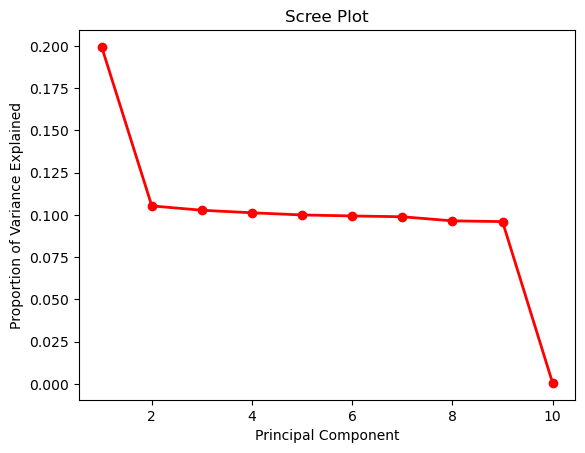

In [22]:
#Creating Scree Plot
PC_values = np.arange(pca.n_components_) + 1
mpl.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
mpl.title('Scree Plot')
mpl.xlabel('Principal Component')
mpl.ylabel('Proportion of Variance Explained')
mpl.show()

In [23]:
# Based on the Kaisure rule, we will keep the PC's with eigenvalues above 1 (.99 is rounded to 1 here) and then run another PCA model

In [24]:
#Creating Reduced PCA dataframe 
pca = PCA(n_components=6)
Principal_components=pca.fit_transform(churn_df)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6
0    -1.536762  0.171914  1.454843  0.095288 -1.256114  0.702028
1    -1.658873 -0.084919 -0.961470  1.269270 -1.102248  1.130166
2    -0.903180 -1.078642  0.158621  0.897587 -1.617589 -0.048204
3    -0.940344  0.924346 -1.249369 -0.261404  0.060980 -1.970635
4    -1.928860  1.402067  1.159692 -0.719183 -0.136843 -0.918535
...        ...       ...       ...       ...       ...       ...
9995  1.893553 -0.657609 -0.633016 -0.221280  1.390348 -0.707759
9996  1.463002  0.132182 -0.794348 -0.981426  0.660400  0.110216
9997  0.574807 -0.592765  0.701985 -0.856073 -0.011257  1.062299
9998  2.013656  1.085126 -1.786779  0.163483 -0.285542  0.906422
9999  1.553021  0.693810 -2.222608 -0.599757 -0.440660  0.089376

[10000 rows x 6 columns]


In [25]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=churn_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Children,0.014135,-0.559467,-0.285319,0.141418,0.031679,-0.057721
Age,0.001708,0.479836,0.421944,-0.089805,-0.159621,0.125006
Income,0.004360,-0.223932,0.267257,0.166468,0.787136,0.210454
Outage_sec_perweek,0.005884,0.212260,-0.479537,0.578438,-0.025686,-0.243383
Email,-0.020779,0.107067,-0.438465,-0.454312,-0.004960,-0.153997
Contacts,0.004175,0.458770,0.013844,0.104530,0.465026,-0.550932
Yearly_equip_failure,0.017565,-0.143555,0.395131,0.530963,-0.368864,-0.227787
Tenure,0.705422,0.001851,0.021078,-0.041735,-0.004963,-0.037044
MonthlyCharge,0.040423,0.344887,-0.299619,0.329364,0.029915,0.704988
Bandwidth_GB_Year,0.706917,-0.007922,-0.019661,-0.012803,0.004627,0.002619


In [26]:
#Total explained variance for the 6 PC's
print('Variance explained by all 10 principal components =', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by all 10 principal components = 70.806


In [27]:
#Explained variance for each PC, 1-6
pca.explained_variance_ratio_ * 100

array([19.94133677, 10.53229292, 10.27451155, 10.12457321,  9.99695569,
        9.9368061 ])

In [28]:
#Eigenvalues per PC, 1-6
eigenvalues = pca.explained_variance_
eigenvalues

array([1.99433311, 1.05333463, 1.02755391, 1.01255858, 0.99979555,
       0.99377999])

In [29]:
#Cumulative sum
np.cumsum(pca.explained_variance_ratio_*100)

array([19.94133677, 30.47362969, 40.74814124, 50.87271445, 60.86967014,
       70.80647624])

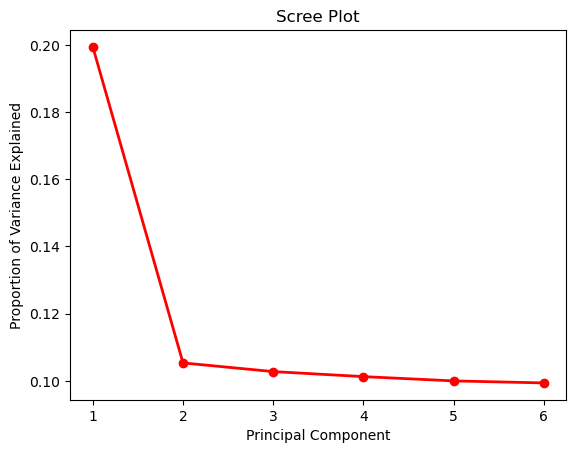

In [30]:
#Final Scree Plot
PC_values = np.arange(pca.n_components_) + 1
mpl.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
mpl.title('Scree Plot')
mpl.xlabel('Principal Component')
mpl.ylabel('Proportion of Variance Explained')
mpl.show()